# McDonald's Case study 

In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings('ignore')


In [106]:
DF = pd.read_csv("mcdonalds.csv")
DF.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [107]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,

HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study con- ducted in preparation of the survey study. For each of those attributes, respondents

provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

these are not the responses that can be used for segmentation we will need numbers


In [108]:
# Extract the first 11 columns througg iloc 
DF = DF.iloc[:, :11]

# Convert "Yes" to 1 and everything else to 0
DF = (DF == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = DF.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [109]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [110]:
print(pd.isnull(DF).sum())

yummy         0
convenient    0
spicy         0
fattening     0
greasy        0
fast          0
cheap         0
tasty         0
expensive     0
healthy       0
disgusting    0
dtype: int64


In [111]:
DF.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see we have succefully converted the dataframe into integer values

-Another way of exploring data-____> principal components
analysis, and create a perceptual map.
-A perceptual map offers initial insights into
how attributes are rated by respondents and, importantly, which attributes tend to be
rated in the same way.___>
-Principal components analysis is not computed to reduce the
number of variables. 
This approach – also referred to as ____>factor-cluster analysis. Here, we
calculate principal components because we use the resulting components to rotate
and project the data for the perceptual map. We use unstandardised data because our
segmentation variables are all binary.

In [112]:
from sklearn.decomposition import PCA #Imports the PCA class from scikit-learn's decomposition module for performing PCA.

In [113]:
pca = PCA() #Initializes the PCA object.

DF_pca = pca.fit_transform(df) # Fits the PCA model to df and transforms the data.


# Summary of PCA
standard_deviations = np.sqrt(pca.explained_variance_)
explained_variance = pca.explained_variance_ratio_ #Retrieves the explained variance ratio of each principal component.
cumulative_variance = np.cumsum(explained_variance) #Calculates the cumulative explained variance.

# Print the summary similar to R's summary function
print("Standard deviation")
print(np.round(standard_deviations,4))

print("\nExplained variance by component:")
print(np.round(explained_variance, 4))

print("\nCumulative explained variance:")
print(np.round(cumulative_variance, 4))

Standard deviation
[0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Explained variance by component:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative explained variance:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [114]:
loadings = pca.components_

print("\nPrincipal component loadings (rounded to 3 decimal place):")
loadings_DF = pd.DataFrame(np.round(loadings,3 ), columns=DF.columns) #The principal component loadings are stored in loadings, which is then 
#converted into a pandas DataFrame and rounded to 1 decimal place before printing.
print(loadings_DF
    )


Principal component loadings (rounded to 3 decimal place):
    yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
0  -0.477      -0.155 -0.006      0.116   0.304 -0.108 -0.337 -0.472   
1   0.364       0.016  0.019     -0.034  -0.064 -0.087 -0.611  0.307   
2  -0.304      -0.063 -0.037     -0.322  -0.802 -0.065 -0.149 -0.287   
3   0.055      -0.142  0.198     -0.354   0.254 -0.097  0.119 -0.003   
4  -0.308       0.278  0.071     -0.073   0.361  0.108 -0.129 -0.211   
5   0.171      -0.348 -0.355     -0.407   0.209 -0.595 -0.103 -0.077   
6  -0.281      -0.060  0.708     -0.386   0.036 -0.087 -0.040  0.360   
7   0.013      -0.113  0.376      0.590  -0.138 -0.628  0.140 -0.073   
8   0.572      -0.018  0.400     -0.161  -0.003  0.166  0.076 -0.639   
9  -0.110      -0.666 -0.076     -0.005   0.009  0.240  0.428  0.079   
10  0.045      -0.542  0.142      0.251   0.002  0.339 -0.489  0.020   

    expensive  healthy  disgusting  
0       0.329   -0.214       0.375  
1

In [115]:
DF.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


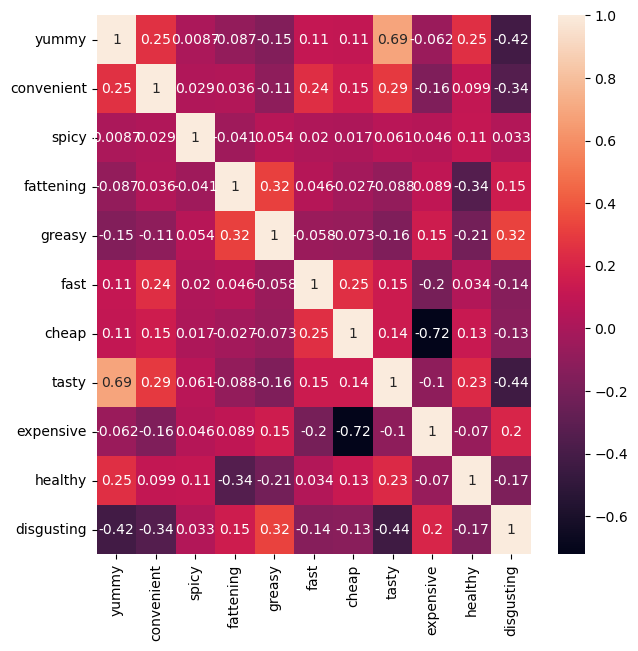

In [116]:
plt.figure(figsize=(7,7))
sns.heatmap(DF.corr(), annot=True)
plt.show()

The loadings indicate how the original variables are combined to form principal
components. Loadings guide the interpretation of principal components.

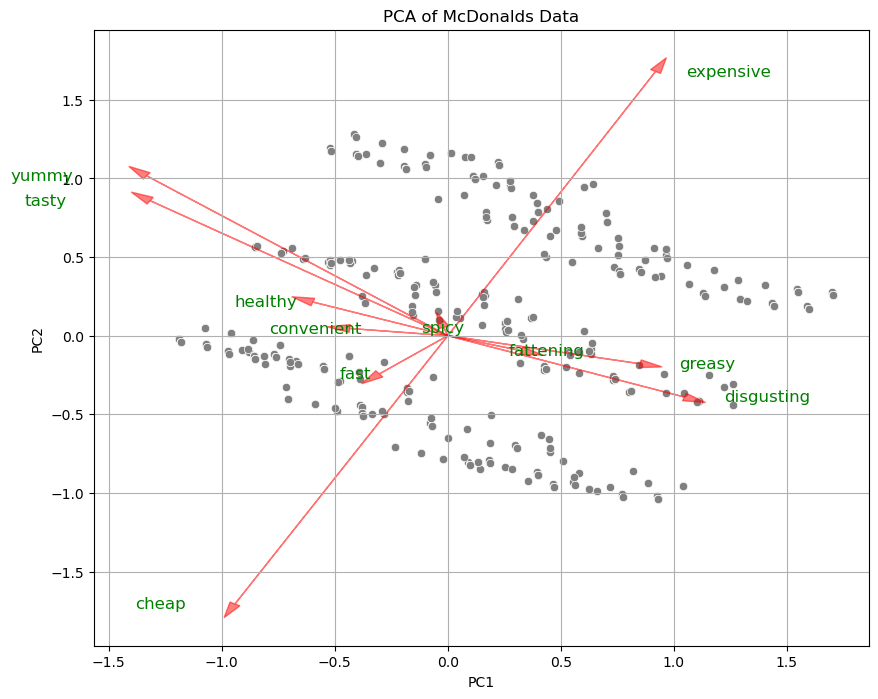

In [117]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=DF_pca[:, 0], y=DF_pca[:, 1], color="grey")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data')
# Scale the loadings for better visualization
scaling_factor = np.max(np.abs(DF_pca[:, :2])) / np.max(np.abs(loadings[:2, :]))

for i, feature in enumerate(DF.columns):
    plt.arrow(0, 0, loadings[0, i] * scaling_factor, loadings[1, i] * scaling_factor, 
              color='r', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(loadings[0, i] * scaling_factor * 1.35, loadings[1, i] * scaling_factor * 1.0, 
             feature, color='g', ha='center', va='center', fontsize=12)

plt.grid()
plt.show()


#Calculate the loadings (principal component vectors) from the PCA components.
#Use plt.arrow to draw arrows representing the original features projected onto the PCA plot.
#Use plt.text to label the arrows with the original feature names.

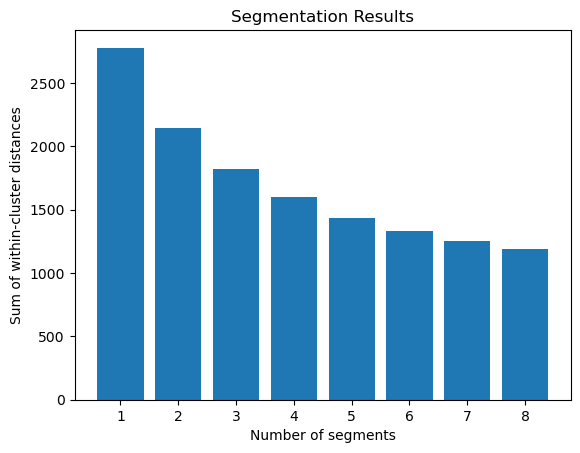

In [118]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder

np.random.seed(1234)
restart = 10
num_segments = range(1, 9)
within_cluster_distances = []
DF_km28 = {}

for k in num_segments:
  kmeans = KMeans(n_clusters =k, n_init = restart, random_state=1234)
  kmeans.fit(DF)
  within_cluster_distances.append((kmeans.inertia_))
  DF_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


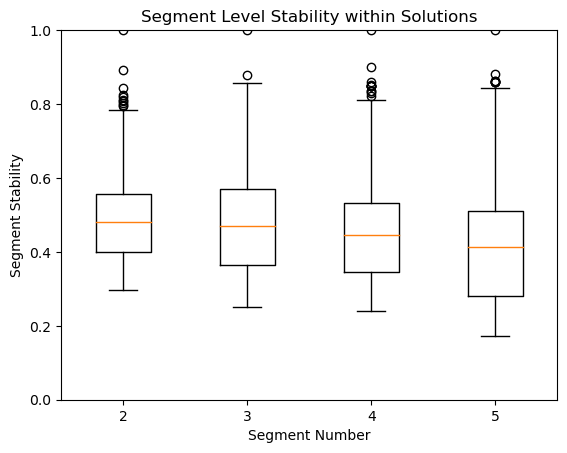

In [119]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = DF_km28[segment].predict(DF)
    segment_similarities[segment] = DF_km28[segment].transform(DF).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [120]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
DF_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(DF.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = DF.shape
    aic =  2 * k - 2 * log_likelihood
    bic =  np.log(n_samples) * k - 2 * log_likelihood 
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic + class_entropy
    
    DF_m28.append((iter_val,converged, k_val,  k0_val, log_likelihood, aic, bic, icl))
DF_m28 = pd.DataFrame(DF_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(DF_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     7       True  2   2 -2145.503727  4295.007454  4305.570225  4306.235903
1    10       True  3   3 -1819.748502  3645.497005  3661.341162  3662.421867
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3236.441461
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2908.647526
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2709.777411
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2551.344897
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2443.446738


In [121]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(DF)
kmeans_clusters = kmeans.predict(DF)

gauss = GaussianMixture(n_components=k, random_state=1234)
gauss.fit(DF)
gauss_clusters = gauss.predict(DF)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gauss_clusters})

DF_m4 = DF[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(DF_m4)
k4_m4_clusters = k4_m4.predict(DF_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276
kmeans   0   1   2   3
kmeans                
0       39  20  21  10
1       22  10  15   6
2       55  20  34  19
3       34  15  22   8


In [122]:
from sklearn.mixture import GaussianMixture

gauss_n4a = GaussianMixture(n_components=4)
gauss_n4a.fit(DF)

log_likelihood_n4a = gauss_n4a.score(DF)

gauss_n4 = GaussianMixture(n_components=4)
gauss_n4.fit(DF)

log_likelihood_n4 = gauss_n4.score(DF)

print("Log-likelihood for X.n4a:", log_likelihood_n4a)
print("Log-likelihood for X.n4:", log_likelihood_n4)

Log-likelihood for X.n4a: 11.068744792060572
Log-likelihood for X.n4: 3.642746401176583


In [98]:
like_count = pd.value_counts(DF['Like'])
reverse_count = like_count.iloc[::-1]
print(reverse_count)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


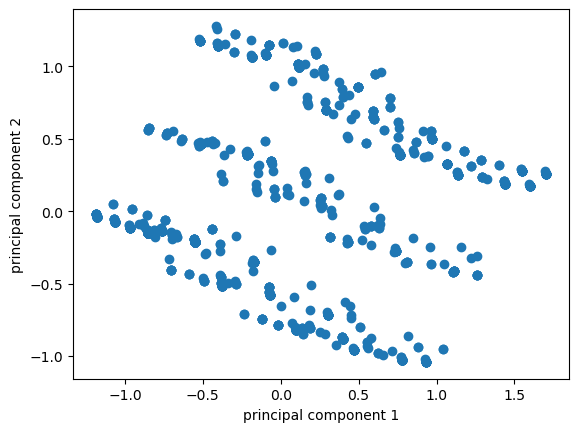

In [123]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(DF)

pca = PCA(n_components=2)
DF_pca = pca.fit_transform(DF)

fig, ax = plt.subplots()

ax.scatter(DF_pca[:, 0], DF_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()